In [1]:
import glob
import numpy as np
import pandas as pd

import clima_anom as ca

import matplotlib.cbook
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

import cartopy
import cartopy.crs as ccrs

import sys
sys.path.append('../../function/')
from Funciones import dbz2mm, mm2dbz

### Reflectivity Profile
- TRMM Maxdbz : Maximum reflectivity profile with 0.5 km interval (0.01dBZ)
- IMERG Maxdbz: maximum 1km reflectivity at 0.5-20km by 0.5km interval (dBZ)

In [2]:
# satellite = 'TRMM'
satellite = 'GPM'

In [3]:
if satellite == 'TRMM':
    product = 'rpf'
    dir_input = '/mnt/Data/Data/PF/TRMM/rpf/*.HDF'
    out_input = '/mnt/Data/Data/PF/TRMM/rpf_SA/RP/'

elif satellite == 'GPM':
    product = 'rgpf'
    dir_input = '/mnt/Data/Data/PF/GPM/rgpf/*.HDF'
    out_input = '/mnt/Data/Data/PF/GPM/rgpf_SA/RP/'

else:
    raise ValueError('Invalid satellite')

print(f'Satellite: {satellite}')
print(f'Product  : {product}')
print(f'Directory: {dir_input}')

Satellite: GPM
Product  : rgpf
Directory: /mnt/Data/Data/PF/GPM/rgpf/*.HDF


In [4]:
list_files = glob.glob(dir_input)
list_files = sorted(list_files)
len_files = len(list_files)
print(f'{len_files} files found')
list_files[0:2]

84 files found


['/mnt/Data/Data/PF/GPM/rgpf/pf_201403_level2.HDF',
 '/mnt/Data/Data/PF/GPM/rgpf/pf_201404_level2.HDF']

In [6]:
levels_reflec = np.arange(0.5, 20.5, 0.5)

for nn in range(len_files):

    file_input = list_files[nn]
    print(file_input)

    data = ca.read_netcdf(file_input,0)
    lat = data['LAT'].data.byteswap().newbyteorder()
    lon = data['LON'].data.byteswap().newbyteorder()

    data_in = data['MAXDBZ'].byteswap().newbyteorder()

    if satellite == 'TRMM':
        data_in = data_in*0.01

    # data_in[data_in==np.min(data_in)] = -999.9
    data_in.shape

    pd_in = pd.DataFrame(data_in, columns=levels_reflec)
    pd_in.insert(0, "lat", lat, True)
    pd_in.insert(1, "lon", lon, True)

    # South America Region
    out1 = pd_in[(pd_in['lon'] >= -85) & (pd_in['lon'] <= -30 )]
    out2 = out1[(out1['lat'] >= -45) & (out1['lat'] <= 15 )]
    out2 = out2.reset_index(drop=True)

    # export dataframe to csv
    salida = out_input + file_input.split('/')[-1].replace('.HDF','.csv').replace('pf',product+'_RP') 
    print(f'Exporting data to {salida}')
    out2.to_csv(salida,header=True,index=False)
    print()

/mnt/Data/Data/PF/GPM/rgpf/pf_201403_level2.HDF
Exporting data to /mnt/Data/Data/PF/GPM/rgpf_SA/RP/rgpf_RP_201403_level2.csv

/mnt/Data/Data/PF/GPM/rgpf/pf_201404_level2.HDF
Exporting data to /mnt/Data/Data/PF/GPM/rgpf_SA/RP/rgpf_RP_201404_level2.csv

/mnt/Data/Data/PF/GPM/rgpf/pf_201405_level2.HDF
Exporting data to /mnt/Data/Data/PF/GPM/rgpf_SA/RP/rgpf_RP_201405_level2.csv

/mnt/Data/Data/PF/GPM/rgpf/pf_201406_level2.HDF
Exporting data to /mnt/Data/Data/PF/GPM/rgpf_SA/RP/rgpf_RP_201406_level2.csv

/mnt/Data/Data/PF/GPM/rgpf/pf_201407_level2.HDF
Exporting data to /mnt/Data/Data/PF/GPM/rgpf_SA/RP/rgpf_RP_201407_level2.csv

/mnt/Data/Data/PF/GPM/rgpf/pf_201408_level2.HDF
Exporting data to /mnt/Data/Data/PF/GPM/rgpf_SA/RP/rgpf_RP_201408_level2.csv

/mnt/Data/Data/PF/GPM/rgpf/pf_201409_level2.HDF
Exporting data to /mnt/Data/Data/PF/GPM/rgpf_SA/RP/rgpf_RP_201409_level2.csv

/mnt/Data/Data/PF/GPM/rgpf/pf_201410_level2.HDF
Exporting data to /mnt/Data/Data/PF/GPM/rgpf_SA/RP/rgpf_RP_201410_leve

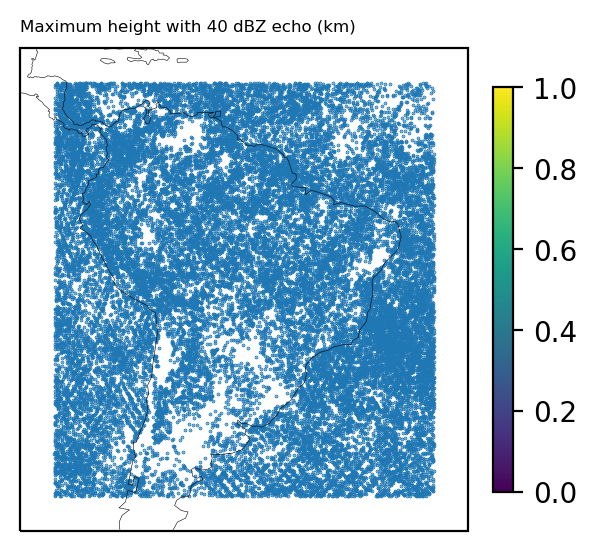

In [7]:
alt_ref = 5

proj = ccrs.PlateCarree()
cmap = plt.cm.Spectral_r

fig = plt.figure(figsize=(7,4),dpi=200)
gs = gridspec.GridSpec(1,2)

ax1 = plt.subplot(gs[0, 0], projection = proj)
ax1.coastlines(linestyle='-',linewidth=0.2,color='black',zorder=4)
ax1.set_extent([-90,-25,-50,20],crs=proj)
a1 = ax1.scatter(out2['lon'],out2['lat'],cmap=cmap,s=0.1,zorder=3)
ax1.set_title('Maximum height with 40 dBZ echo (km)',fontsize=6,loc='left')
plt.colorbar(a1,fraction=0.041)

# ax1 = plt.subplot(gs[0, 1], projection = proj)
# ax1.coastlines(linestyle='-',linewidth=0.2,color='black',zorder=4)
# ax1.set_extent([-90,-25,-50,20],crs=proj)
# ax1.set_title('Maximum height with 40 dBZ echo (km) > '+str(alt_ref)+'km',fontsize=6,loc='left')
# plt.colorbar(a1,fraction=0.041)